# Background

Introduction ..d
fad 

# Import Packages

In [5]:
import numpy as np
import pandas as pd

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

# import xgboost
import xgboost as xgb

# Load Data

In [7]:
like_songs = pd.read_csv('../data/liked spotify songs.csv')
dislike_songs = pd.read_csv('../data/disliked spotify songs.csv')

In [120]:
like_songs.shape
like_songs.isna().sum()

artist              0
album               0
track_name          0
track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
song_like           0
dtype: int64

In [9]:
dislike_songs.shape

(100, 16)

In [10]:
# First 5 songs in Spotify playlist with our liked songs
like_songs.head(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Tom Lee Hong Kong Youth NeoWinds Orchestra,"2011 WASBE Chiayi City, Taiwan: Tom Lee Hong K...","Hymn to the Sun, ""With the Beat of Mother Earth""",4olLv2XSxKmEYFeA6JtuJ2,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4
1,LANY,Malibu Nights,Malibu Nights,0Eqg0CQ7bK3RQIMPw1A7pl,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4
2,Ed Sheeran,+,Give Me Love,0SuG9kyzGRpDqrCWtgD6Lq,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4


In [11]:
# Last 5 songs in Spotify playlist with our liked songs
like_songs.tail(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
97,Baek Ji Young,I still love you a lot,I still love you a lot,2zCORPZHF7g9SPjZfrGVuy,0.548,0.404,4,-5.618,1,0.0314,0.00000,0.0791,0.486,129.795,227867,4
98,TOTO,Toto IV,Africa,2374M0fQpWi3dLnB54qaLX,0.671,0.373,9,-18.064,1,0.0323,0.00008,0.0481,0.732,92.718,295893,4
99,Avril Lavigne,Goodbye Lullaby (Deluxe Edition),Wish You Were Here,72po8JKu6e1hLtQ7kGJPg3,0.460,0.866,1,-3.864,0,0.0559,0.00000,0.1900,0.345,165.956,225680,4


In [12]:
# First 5 songs in Spotify playlist with our disliked songs
dislike_songs.head(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Katy Perry,Smile,Cry About It Later,7cLrrJ1Dk6WAQyDIj9j26A,0.699,0.669,2,-5.829,0,0.0712,0.000017,0.248,0.4440,125.994,189773,4
1,Meghan Trainor,TREAT MYSELF (DELUXE),You Don't Know Me,3xGTNPcwsvonkWUQV1Wsqu,0.579,0.763,9,-4.155,0,0.0717,0.000000,0.205,0.6170,106.029,210834,4
2,Justin Bieber,Lonely (with benny blanco),Lonely (with benny blanco),4y4spB9m0Q6026KfkAvy9Q,0.631,0.239,11,-7.071,0,0.0398,0.000000,0.116,0.0927,79.859,149297,4


In [13]:
# Last 5 songs in Spotify playlist with our disliked songs
dislike_songs.tail(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
97,Halsey,Manic,You should be sad,7lidXGPXPYLNThITAOTlkK,0.591,0.585,2,-6.350,1,0.0277,0.000000,0.109,0.324,110.940,205473,4
98,H.E.R.,Sometimes,Sometimes,2m0pzukUN2eFutFjnXNFXF,0.540,0.617,3,-7.560,0,0.0723,0.000854,0.109,0.369,151.838,273751,4
99,Chris Brown,Slime & B,Go Crazy,1IIKrJVP1C9N7iPtG6eOsK,0.755,0.578,0,-8.932,0,0.1450,0.000000,0.250,0.581,94.148,176960,4


# Preliminary Analysis

In [15]:
# Columns in our dataset
like_songs.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [16]:
# Describing the columns in our liked songs dataset
like_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.551960,0.523324,5.430000,-7.867940,0.830000,0.057327,0.045659,0.200942,0.373591,119.756020,260022.800000,3.940000
std,0.151527,0.199619,3.593639,3.473365,0.377525,0.048058,0.171749,0.180012,0.211411,29.301727,88006.034145,0.238683
min,0.161000,0.092400,0.000000,-18.064000,0.000000,0.024300,0.000000,0.033300,0.057200,71.994000,160347.000000,3.000000
25%,0.467500,0.381250,2.000000,-9.537750,1.000000,0.032375,0.000000,0.096600,0.190000,94.411750,208673.750000,4.000000
50%,0.553500,0.485000,5.500000,-7.150500,1.000000,0.041850,0.000002,0.116000,0.334000,119.930000,235966.500000,4.000000
75%,0.667000,0.655000,8.000000,-5.660750,1.000000,0.059725,0.000133,0.237750,0.493500,138.633750,283189.750000,4.000000
max,0.897000,0.941000,11.000000,-0.323000,1.000000,0.360000,0.913000,0.795000,0.884000,192.099000,663333.000000,4.000000


**Observations:**
- The longest song is 663333ms, which is ~11mins.
- Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. Among the 100 songs, danceability has a mean of 0.55. This could mean that our songs are pretty balanced in terms of rhythm and tempo.

# Preprocessing

In [19]:
# classification, 1 for like, 0 for dislike
# Adding the song_like column to our liked songs dataframe
like_songs['song_like'] = 1
like_songs.tail()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
95,JJ Lin,JJ林俊傑100天,第幾個100天,2tXTEROacuvyybcZoX9RmT,0.247,0.475,0,-6.658,1,0.0286,0.00000,0.1300,0.201,96.429,278895,3,1
96,Cass Elliot,Dream A Little Dream Of Me,Dream A Little Dream Of Me,3cOWCcBKwiwUs5PCYirwMI,0.410,0.532,11,-10.394,0,0.1950,0.00000,0.6980,0.406,134.128,221373,4,1
97,Baek Ji Young,I still love you a lot,I still love you a lot,2zCORPZHF7g9SPjZfrGVuy,0.548,0.404,4,-5.618,1,0.0314,0.00000,0.0791,0.486,129.795,227867,4,1
98,TOTO,Toto IV,Africa,2374M0fQpWi3dLnB54qaLX,0.671,0.373,9,-18.064,1,0.0323,0.00008,0.0481,0.732,92.718,295893,4,1
99,Avril Lavigne,Goodbye Lullaby (Deluxe Edition),Wish You Were Here,72po8JKu6e1hLtQ7kGJPg3,0.460,0.866,1,-3.864,0,0.0559,0.00000,0.1900,0.345,165.956,225680,4,1


In [20]:
# Adding the song_like column to our disliked songs dataframe
dislike_songs['song_like'] = 0
dislike_songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,Katy Perry,Smile,Cry About It Later,7cLrrJ1Dk6WAQyDIj9j26A,0.699,0.669,2,-5.829,0,0.0712,0.000017,0.2480,0.4440,125.994,189773,4,0
1,Meghan Trainor,TREAT MYSELF (DELUXE),You Don't Know Me,3xGTNPcwsvonkWUQV1Wsqu,0.579,0.763,9,-4.155,0,0.0717,0.000000,0.2050,0.6170,106.029,210834,4,0
2,Justin Bieber,Lonely (with benny blanco),Lonely (with benny blanco),4y4spB9m0Q6026KfkAvy9Q,0.631,0.239,11,-7.071,0,0.0398,0.000000,0.1160,0.0927,79.859,149297,4,0
3,Shawn Mendes,Monster,Monster (Shawn Mendes & Justin Bieber),2Z8yfpFX0ZMavHkcIeHiO1,0.652,0.383,2,-7.076,0,0.0516,0.000000,0.0828,0.5490,145.765,178994,4,0
4,Justin Bieber,Purpose (Deluxe),Love Yourself,1f8zcJPvJKvxAOjEqM0pyc,0.609,0.378,4,-9.828,1,0.4380,0.000000,0.2800,0.5150,100.418,233720,4,0


In [21]:
import pandas as pd

# Combine the liked_songs and disliked_songs DataFrames using pd.concat
songs = pd.concat([like_songs, dislike_songs], ignore_index=False)

# Check the shape of the combined DataFrame
print(songs.shape)




(200, 17)


In [22]:
# Drop duplicated songs
songs = songs.drop_duplicates()
songs.shape

(200, 17)

In [23]:
# drop track_name and artist cuz we are going to build a model
# we do not drop previously, cuz we will need track_name and artist to 
# show case our results
df = songs.drop(['track_name','artist','track_id','album'], axis = 1)

In [24]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4,1
1,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4,1
2,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4,1
3,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4,1
4,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4,1


# Exploratory Data Analysis

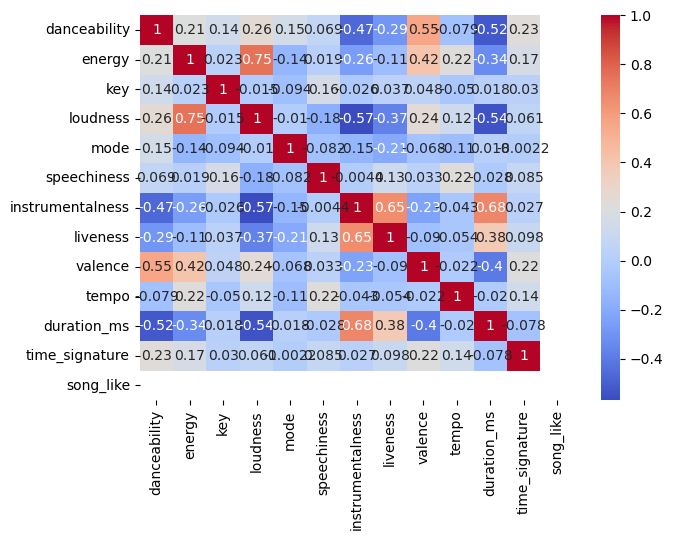

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the DataFrame
numeric_like_songs = like_songs.select_dtypes(include='number')

# Plot the correlation matrix
plt.figure(figsize=[7,5])
sns.heatmap(numeric_like_songs.corr(), annot=True, cmap='coolwarm')
plt.show()


Based on correlation plot, `loudness` and `energy` are very correlated. This makes sense because we can infer that high energy songs are usually loud in character.

Text(0.5, 1.0, 'Artist Name vs Count of songs')

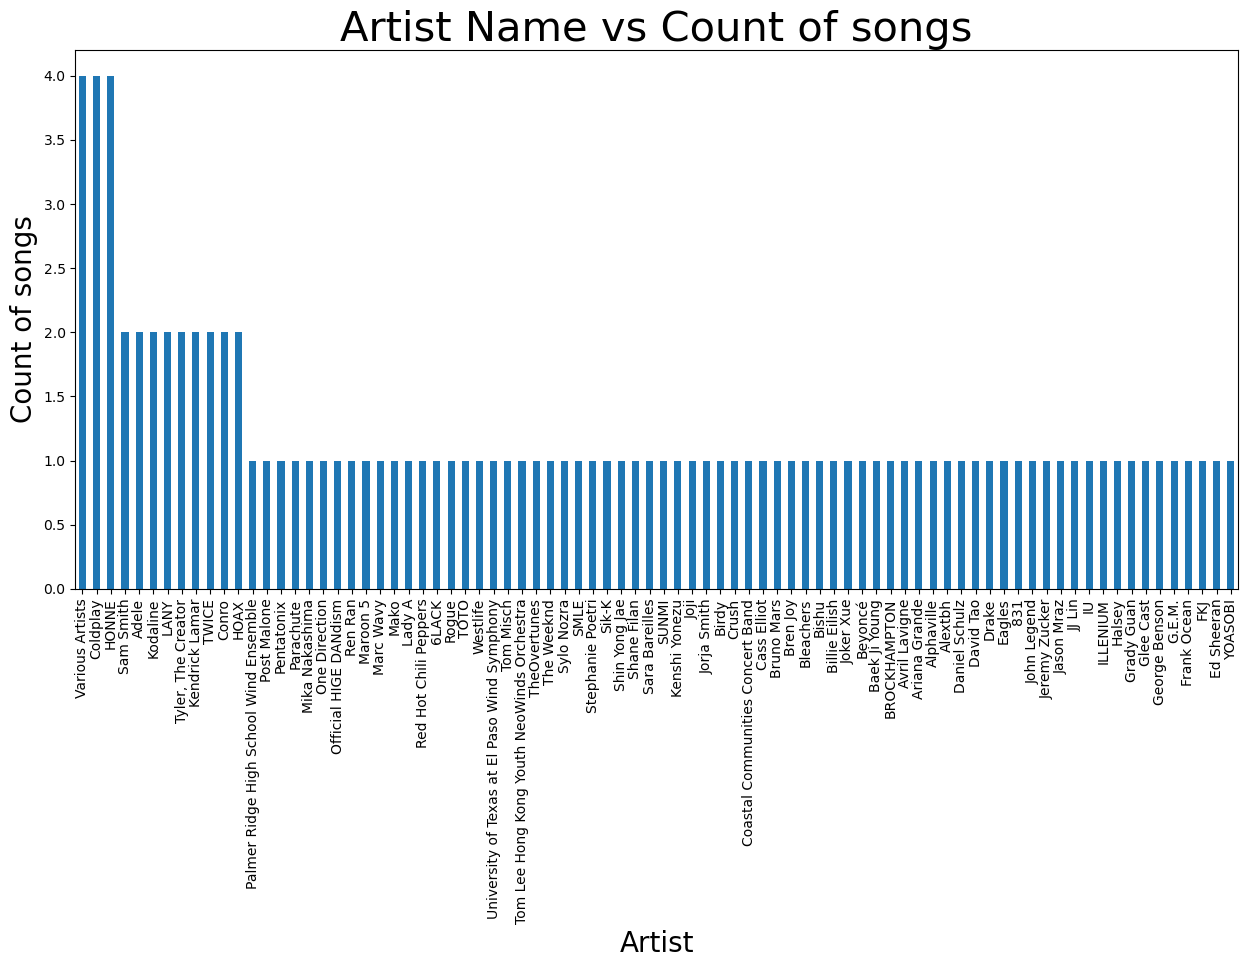

In [28]:
# Bar chart showing artists with a higher song count in our liked songs playlist
fig = plt.figure(figsize = (15,7))
like_songs.groupby('artist')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

In [29]:
# Object data to category
for col in like_songs.select_dtypes(include=['object']).columns:
    like_songs[col] = like_songs[col].astype('category')
    
# Encoding categorical features
for col in like_songs.select_dtypes(include=['category']).columns:
    like_songs[col] = like_songs[col].cat.codes

<Axes: xlabel='loudness', ylabel='energy'>

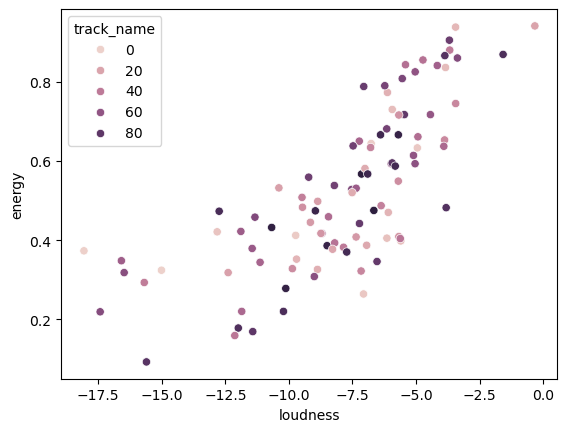

In [30]:
# Scatter plot showing relationship between loudness and energy of our liked songs
sns.scatterplot(data=like_songs, x='loudness', y='energy', hue='track_name')

C:\Users\aruny\AppData\Local\Temp\ipykernel_21836\2058306071.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(songs[songs['song_like']==1]['danceability'], color='red', bins=40)
C:\Users\aruny\AppData\Local\Temp\ipykernel_21836\2058306071.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(so

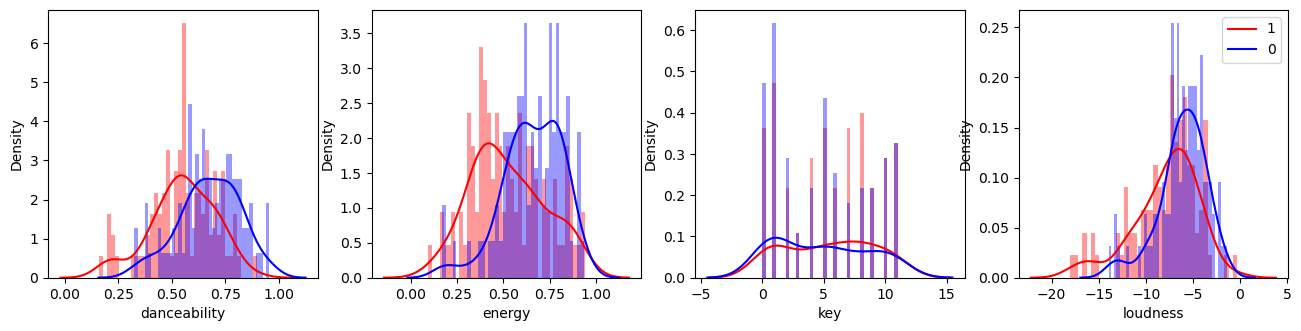

In [31]:
# Visualization of danceability, energy, key and loudness song data
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

**Observations**:
- For liked songs, `danceability` and `energy` has a lower mean than that of unliked songs. This implies that these liked songs have a lower `danceability` and `energy` score, which could mean soothing, calming songs. 
- As for `loudness`, both liked and unliked songs have roughly similar distributions (left-skew).

C:\Users\aruny\AppData\Local\Temp\ipykernel_21836\863282619.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(songs[songs['song_like']==1]['valence'], color='red', bins=40)
C:\Users\aruny\AppData\Local\Temp\ipykernel_21836\863282619.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(songs[son

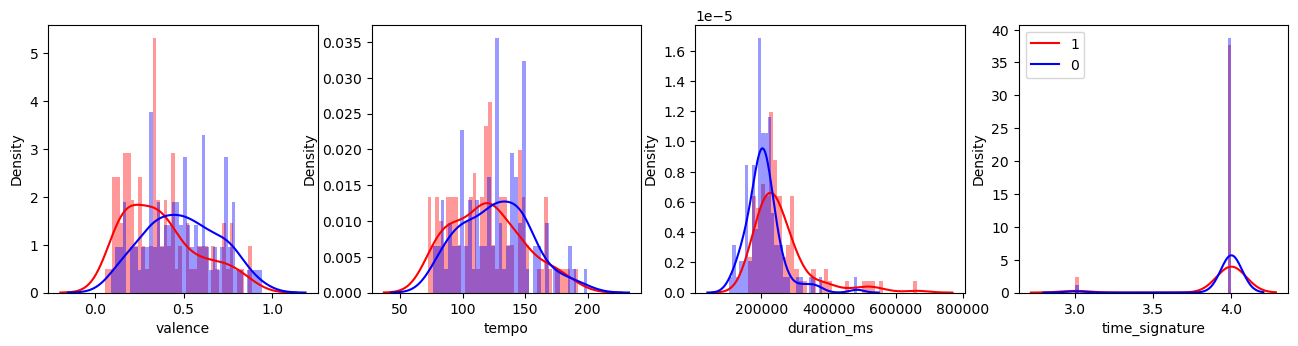

In [33]:
 # Visualization of valence, tempo, duration_ms and time signature data
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

Text(0.5, 0, 'artist')

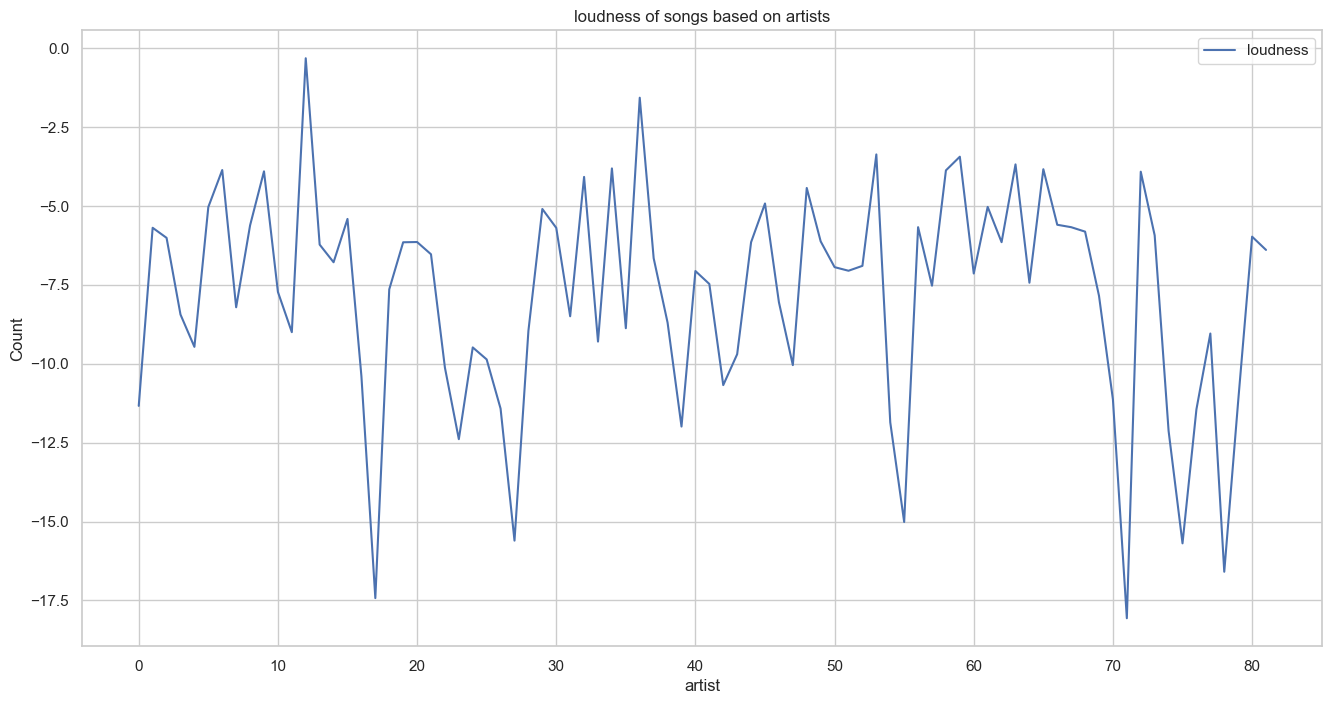

In [34]:
# Loudness of songs based on artists
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = like_songs.groupby("artist")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('loudness of songs based on artists')
ax.set_ylabel('Count')
ax.set_xlabel('artist')

# Modelling

In [36]:
X = df.drop('song_like', axis=1)
y = df['song_like']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
X_train.shape

(134, 12)

In [39]:
y_train.shape

(134,)

In [40]:
X_test.shape

(66, 12)

In [122]:
y_test.shape

(66,)

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Logistic Regression

In [43]:
# create model and fitted over the data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\aruny\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Ensure X_test has the same columns as X_train
X_test = X_test[X_train.columns]

# Make predictions
lr_pred = lr_model.predict(X_test)

# Print Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, lr_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Confusion Matrix:
 [[21 10]
 [10 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        31
           1       0.71      0.71      0.71        35

    accuracy                           0.70        66
   macro avg       0.70      0.70      0.70        66
weighted avg       0.70      0.70      0.70        66

Accuracy: 69.70%


**Observations:**
-  Accuracy of this model is 61%.
- F1-score of like and unlike predictions are quite similar, (0.59 vs 0.62). This is expected because we have a balanced class distribution.

Checking the model by analyze its performance with confusion matrix and classification report
1. precision --> correctly predicted positive observations to the total predicted positive observations
2. recall --> ratio of correctly predicted positive observations to all observations
3. f1 score --> weighted average of precision and recall (accuracy of the model)

## K-Nearest Neighbours (KNN)

In [48]:
# train vanilla knn
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [114]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Ensure X_test has the same columns as X_train
X_test = X_test[X_train.columns]

# Make predictions with KNN model
knn_pred = knn_model.predict(X_test)

# Print Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Confusion Matrix:
 [[19 12]
 [13 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        31
           1       0.65      0.63      0.64        35

    accuracy                           0.62        66
   macro avg       0.62      0.62      0.62        66
weighted avg       0.62      0.62      0.62        66

Accuracy: 62.12%


..dsfa
sdfa

## XG Boost

In [52]:
# create model and fitted
xgb_model = xgb.XGBClassifier(learning_rate=0.2, 
                              max_depth=10, 
                              min_child_weight=10, 
                              n_estimators=250)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
# checking the model performances
xgb_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print('')
print(classification_report(y_test, xgb_pred))

[[20 11]
 [11 24]]

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        31
           1       0.69      0.69      0.69        35

    accuracy                           0.67        66
   macro avg       0.67      0.67      0.67        66
weighted avg       0.67      0.67      0.67        66



In [165]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions with Random Forest model
rf_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_pred)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Accuracy: 69.70%
Confusion Matrix:
 [[23  8]
 [12 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.74      0.70        31
           1       0.74      0.66      0.70        35

    accuracy                           0.70        66
   macro avg       0.70      0.70      0.70        66
weighted avg       0.70      0.70      0.70        66



In [181]:
import numpy as np
import pandas as pd

# Your feature values as a single row (note the double square brackets)
data = [[0.526, 0.328, 1, -9.864, 1, 0.0461, 0.000000, 0.1120, 0.1100, 116.068, 526387, 4]]

# Define column names correctly (remove the erroneous additional indexing)
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
           'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create the DataFrame with a single row of data
input_df = pd.DataFrame(data, columns=columns)

# Use the model to predict the class
prediction = xgb_model.predict(input_df)  # This will output either 0 or 1

# Print the result
print("Predicted class:", prediction[0])


Predicted class: 1


dfalkjndlakfd

As expected, tree-boosting algorithms like Xgboost yields the best performance, compared to logistic regression and KNN. 